In [1]:
 print("Basic random forest")

Basic random forest


In [2]:
#import necessary library

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [3]:
#breast cancer build in data set 

data=load_breast_cancer()
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target,name='target')

x.shape

(569, 30)

In [4]:
y.shape

(569,)

In [5]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [6]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.25,
    random_state=42,
    stratify=y
)
x_train.shape

(426, 30)

In [7]:
x_test.shape

(143, 30)

In [8]:
#base line random forest
rf_baseline=RandomForestClassifier(
    n_estimators=100,#ata koto nibo ta decide korte hobe cross validation kore 
    #totall number of tree that declair 
    random_state=42
)
rf_baseline.fit(x_train,y_train)
y_pred=rf_baseline.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
#model score 
accuracy_score(y_test,y_pred)

0.958041958041958

In [10]:
#see clasification report 
classification_report(y_test,y_pred,target_names=data.target_names)

'              precision    recall  f1-score   support\n\n   malignant       0.96      0.92      0.94        53\n      benign       0.96      0.98      0.97        90\n\n    accuracy                           0.96       143\n   macro avg       0.96      0.95      0.95       143\nweighted avg       0.96      0.96      0.96       143\n'

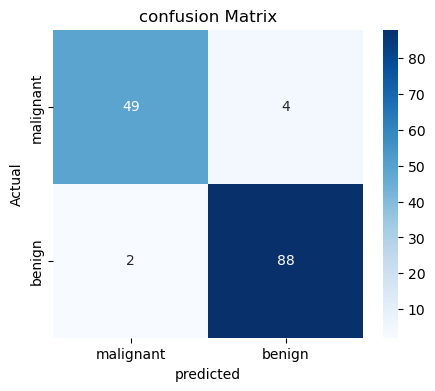

In [11]:
#confision matrix 
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=data.target_names,
            yticklabels=data.target_names)

plt.xlabel('predicted')
plt.ylabel("Actual")
plt.title("confusion Matrix")
plt.show()